# PI Control Example
also featuring computation delays and firing rate estimates

In [3]:
%reset -f  # if previously used Brian objects are preventing simulation
%load_ext autoreload
%autoreload 2

In [4]:
from brian2 import *
from clocsim.base import *

import matplotlib.pyplot as plt

## Create Brian network

In [5]:
population = NeuronGroup(100, '''
            dv/dt = (-v - 70*mV + Rm*I) / tau : volt
            tau: second
            Rm: ohm
            I: amp''',
        threshold='v>-50*mV',
        reset='v=-70*mV'
)
population.tau = 10*ms
population.Rm = 100*Mohm
population.I = 0*mA
population.v = -70*mV

input_group = PoissonGroup(100, np.arange(100)*Hz + 10*Hz)

S = Synapses(input_group, population, on_pre='v+=5*mV')
S.connect(condition='abs(i-j)<=3')

pop_mon = SpikeMonitor(population)

### Run simulation without control:

In [6]:
net = Network(collect())
net.run(100*ms)

INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.24s). [brian2.stateupdaters.base.method_choice]


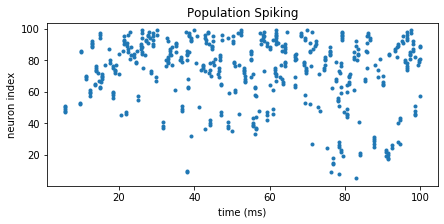

In [7]:
fig_size=(7, 3)
plt.figure(figsize=fig_size);
plt.plot(pop_mon.t / ms, pop_mon.i, '.'); 
plt.title('Population Spiking'); plt.ylabel('neuron index'); plt.xlabel('time (ms)');

## Control loop setup
Now for the control loop--to control neuron $i$, we need to:
- capture spiking using a `SpikeRecorder`
- estimating its firing rate using a `FiringRateEstimator`
- compute the stimulus intensity with a `PIController`
- pass that to a `StateVariableSetter` stimulator manipulating input current

In [ ]:
from clocsim.base import *
from clocsim.recorders import SpikeRecorder
from clocsim.stimulators import StateVariableSetter
import clocsim.control_loop as cl

i = 20  # neuron to control

sim = CLOCSimulator(net)
rec = SpikeRecorder('rec', index=i)
sim.inject_recorder(rec)

In [ ]:
class PIRateControlLoop(ControlLoop):
    def __init__(self, )

In [ ]:
sim.inject_stimulator(
        StateVariableSetter(
            'stim', index=range(10), variable_to_ctrl='I', unit=nA),
        population
)